## Python Implementation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# we are using the free glass datset.
data = pd.read_csv('glass.data')

### Attribute Information :-

1. index : 1 to 214
    
2. RI: refractive index

3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

4. Mg: Magnesium

5. Al: Aluminum

6. Si: Silicon

7. K: Potassium

8. Ca: Calcium

9. Ba: Barium

10. Fe: Iron

11. Type of glass: (class attribute)

    -- 1 building_windows_float_processed

    -- 2 building_windows_non_float_processed

    -- 3 vehicle_windows_float_processed

    -- 4 vehicle_windows_non_float_processed (none in this database)

    -- 5 containers

    -- 6 tableware

    -- 7 headlamps

In [3]:
data.head() ## display top 5 observations

,index,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
data.tail() #display last 5 observations

,index,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
209,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [5]:
data.isna().sum() ## check null value

index    0
RI       0
Na       0
Mg       0
Al       0
Si       0
K        0
Ca       0
Ba       0
Fe       0
Class    0
dtype: int64

In [6]:
df=data.drop(labels=['index','Class'], axis=1) ## drop "index" and "class" features

In [7]:
df.describe()  ## statistical information

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


We’ll go ahead and standardise this data as all the data is on a different scale.


In [8]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data = scaler.fit_transform(df)

In [9]:
df = pd.DataFrame(data = scaled_data, columns= df.columns) ## create a dataframe

In [10]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02
mean,-2.737478e-14,2.179980e-15,-2.801497e-16,-3.434428e-16,9.966067e-16,7.470660e-17,-3.137418e-16,-1.763906e-16,-6.121791e-17
std,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00
min,-2.381516e+00,-3.286943e+00,-1.865511e+00,-2.318616e+00,-3.676472e+00,-7.639186e-01,-2.484084e+00,-3.528768e-01,-5.864509e-01
25%,-6.082728e-01,-6.141580e-01,-3.957744e-01,-5.117560e-01,-4.800288e-01,-5.756501e-01,-5.049657e-01,-3.528768e-01,-5.864509e-01
50%,-2.262293e-01,-1.323817e-01,5.527787e-01,-1.704602e-01,1.799655e-01,8.905322e-02,-2.514132e-01,-3.528768e-01,-5.864509e-01
75%,2.614331e-01,5.120326e-01,6.361680e-01,3.715977e-01,5.649621e-01,1.735820e-01,1.518057e-01,-3.528768e-01,4.422417e-01
max,5.137232e+00,4.875637e+00,1.254639e+00,4.125851e+00,3.570524e+00,8.780145e+00,5.094318e+00,5.997210e+00,4.659881e+00


### Implement PCA Using libaray

In [11]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(df)

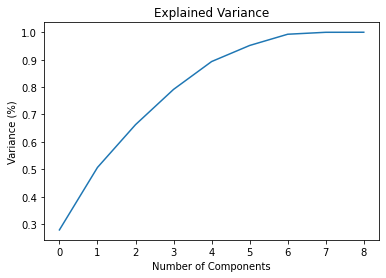

In [12]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

From the diagram above, it can be seen that 4 principal components explain almost 90% of the variance in data and 5 principal components explain around 95% of the variance in data.

So, instead of giving all the columns as input, we’d only feed these 4 principal components of the data to the machine learning algorithm and we’d obtain a similar result.


In [13]:
pca = PCA(n_components=4)
new_data = pca.fit_transform(df)
# This will be the new data fed to the algorithm.
principal_Df = pd.DataFrame(data = new_data, columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4'])

In [14]:
principal_Df.head()

,principal component 1,principal component 2,principal component 3,principal component 4
0,1.151140,-0.529488,-0.372096,1.728901
1,-0.574137,-0.759788,-0.556708,0.760232
2,-0.940160,-0.929836,-0.554907,0.206254
3,-0.142083,-0.961677,-0.117125,0.415724
4,-0.351092,-1.091249,-0.485079,0.069102


Here, we see that earlier we had 9 columns in the data earlier. Now with the help of Sctter plot and PCA, we have reduced the number of features to be used for model building to 4. This is the advantage of PCA.It drastically reduces the number of features, thereby considerably reducing the training time for the model.

### Visualizing the Principal components

As humans can only perceive 3dimensions, we’ll take a dataset with less than 4 dimensions. 


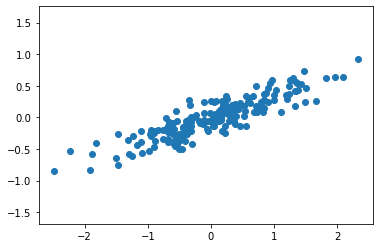

In [15]:
np.random.seed(1) #creating a 2d array dataset
X = np.dot(np.random.random(size=(2, 2)), np.random.normal(size=(2, 200))).T
plt.plot(X[:, 0], X[:, 1], 'o')
plt.axis('equal');

PCA seeks to find the **Principal Axes** in the data, and explain how vital those axes are in describing the data distribution

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_)
print(pca.components_)

[0.7625315 0.0184779]
[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


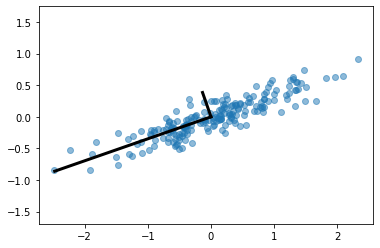

In [17]:
#To see what these numbers mean, let's view them as vectors plotted on top of the data:

plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.5)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=3)
plt.axis('equal');

Notice that one vector is longer than the other. In a sense, this tells us that that direction in the data is somehow more "important" than the other direction.
The explained variance quantifies this measure of "importance" in a direction.

Another way to think of it is that the second principal component could be **completely ignored** without much loss of information! Let's see what our data look like if we only keep 95% of the variance


In [18]:
clf = PCA(0.95) # keep 95% of variance
X_trans = clf.fit_transform(X)
print(X.shape)
print(X_trans.shape)

(200, 2)
(200, 1)


By specifying that we want to throw away 5% of the variance, the data is now compressed by a factor of 50%! Let's see what the data look like after this compression:

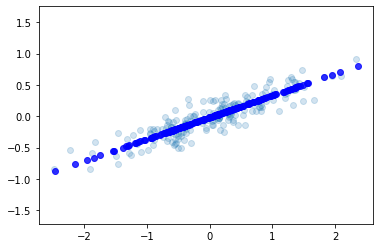

In [19]:
X_new = clf.inverse_transform(X_trans)
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.2)
plt.plot(X_new[:, 0], X_new[:, 1], 'ob', alpha=0.8)
plt.axis('equal');

The lighter points are the original data, while the dark points are the projected version on the principal component axis.  We see that after truncating 5% of the variance of this dataset and then reprojecting it, the "most important" features of the data are maintained, and we've compressed the data by 50%!

This is the sense in which "dimensionality reduction" works: if you can approximate a data set in a lower dimension, you can often have an easier time visualizing it or fitting complicated models to the data.


**Pros of PCA:**

- Correlated features are removed.
- Model training time is reduced.
- Overfitting is reduced.
- Helps in better visualizations
- Ability to handle noise

**Cons of PCA**
- The resultant principal components are less interpretable than the original data
- Can lead to information loss if the explained variance threshold is not considered appropriately.
